<a href="https://colab.research.google.com/github/PraveenAnanth5451/BootCamp/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
teams = ["Team A", "Team B", "Team C", "Team D", "Team E", "Team F", "Team G", "Team H",
         "Team I", "Team J", "Team K", "Team L", "Team M", "Team N", "Team O", "Team P"]
def generate_match_result(home_goals, away_goals):
    if home_goals > away_goals:
        return "Home Win"
    elif home_goals < away_goals:
        return "Away Win"
    else:
        return "Draw"

In [2]:
matches = []
for _ in range(20):
    home_team, away_team = random.sample(teams, 2)
    home_goals = random.randint(0, 5)
    away_goals = random.randint(0, 5)
    possession_home = random.randint(40, 60)
    possession_away = 100 - possession_home
    shots_home = random.randint(5, 15)
    shots_away = random.randint(5, 15)
    fouls_home = random.randint(5, 20)
    fouls_away = random.randint(5, 20)
    yellow_cards_home = random.randint(0, 5)
    yellow_cards_away = random.randint(0, 5)
    red_cards_home = random.randint(0, 1)
    red_cards_away = random.randint(0, 1)
    passing_accuracy_home = random.randint(70, 90)
    passing_accuracy_away = random.randint(70, 90)

    match_result = generate_match_result(home_goals, away_goals)

    matches.append([home_team, away_team, home_goals, away_goals, possession_home, possession_away, shots_home,
                    shots_away, fouls_home, fouls_away, yellow_cards_home, yellow_cards_away, red_cards_home,
                    red_cards_away, passing_accuracy_home, passing_accuracy_away, match_result])
columns = ["Home Team", "Away Team", "Home Goals", "Away Goals", "Possession Home", "Possession Away",
           "Shots Home", "Shots Away", "Fouls Home", "Fouls Away", "Yellow Cards Home", "Yellow Cards Away",
           "Red Cards Home", "Red Cards Away", "Passing Accuracy Home", "Passing Accuracy Away", "Match Result"]

df = pd.DataFrame(matches, columns=columns)
df.to_csv("football_large_dataset.csv", index=False)
print("Dataset created successfully!")


Dataset created successfully!


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv("/content/football_large_dataset.csv")


encoder = LabelEncoder()
df["Home Team"] = encoder.fit_transform(df["Home Team"])
df["Away Team"] = encoder.fit_transform(df["Away Team"])
df["Match Result"] = encoder.fit_transform(df["Match Result"])
features = ["Home Team", "Away Team", "Home Goals", "Away Goals", "Possession Home", "Possession Away",
            "Shots Home", "Shots Away", "Fouls Home", "Fouls Away", "Yellow Cards Home", "Yellow Cards Away",
            "Red Cards Home", "Red Cards Away", "Passing Accuracy Home", "Passing Accuracy Away"]
target = "Match Result"


In [5]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, predictions))

Model Accuracy: 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-9-c07bdaacb6b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Match Result", data=df, palette="viridis")


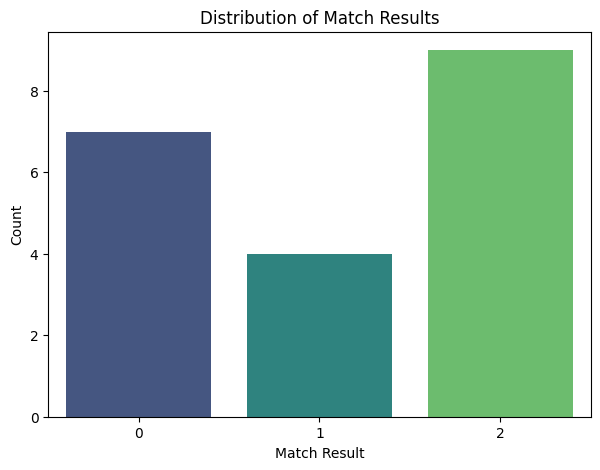

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(x="Match Result", data=df, palette="viridis")
plt.title("Distribution of Match Results")
plt.xlabel("Match Result")
plt.ylabel("Count")
plt.show()


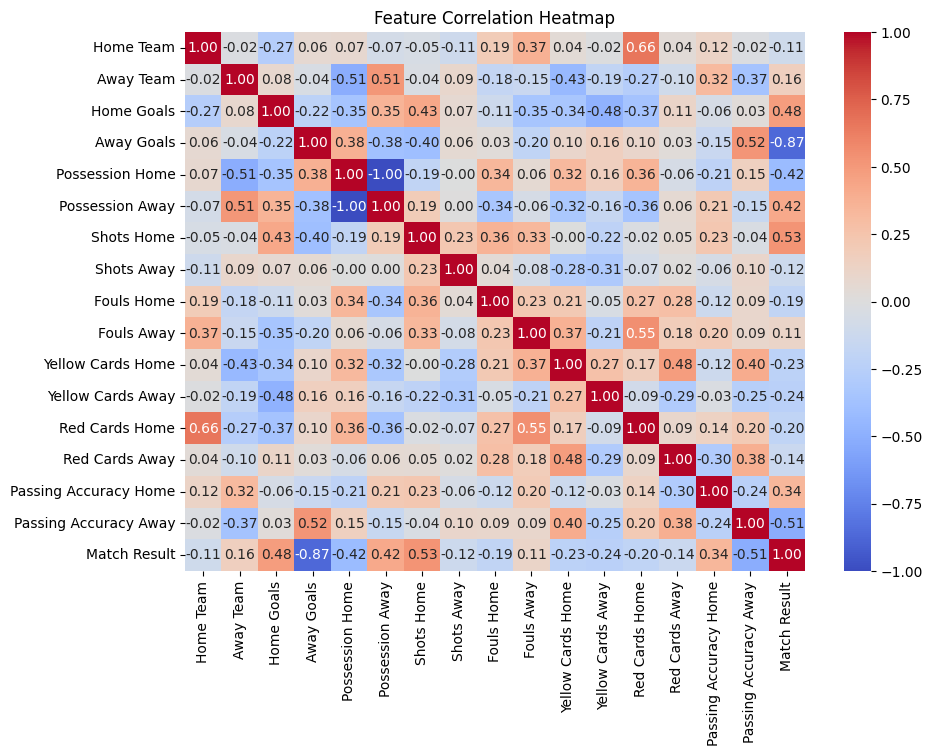

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


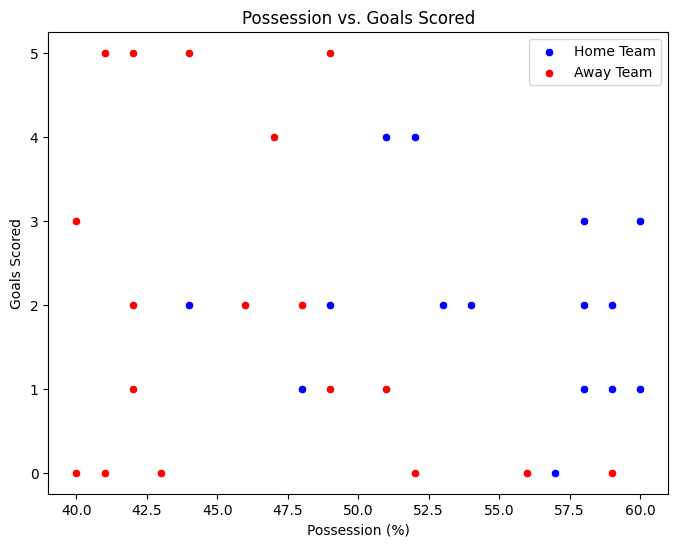

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Possession Home"], y=df["Home Goals"], label="Home Team", color="blue")
sns.scatterplot(x=df["Possession Away"], y=df["Away Goals"], label="Away Team", color="red")
plt.xlabel("Possession (%)")
plt.ylabel("Goals Scored")
plt.title("Possession vs. Goals Scored")
plt.legend()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
encoder = LabelEncoder()
df["Home Team"] = encoder.fit_transform(df["Home Team"])
df["Away Team"] = encoder.fit_transform(df["Away Team"])
df["Match Result"] = encoder.fit_transform(df["Match Result"])

features = ["Home Team", "Away Team", "Home Goals", "Away Goals", "Possession Home", "Possession Away",
            "Shots Home", "Shots Away", "Fouls Home", "Fouls Away", "Yellow Cards Home", "Yellow Cards Away",
            "Red Cards Home", "Red Cards Away", "Passing Accuracy Home", "Passing Accuracy Away"]
target = "Match Result"



In [15]:
X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



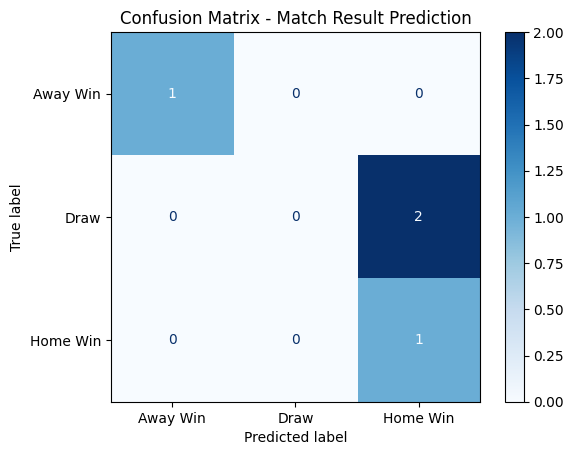

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Away Win", "Draw", "Home Win"])
disp.plot(cmap="Blues")

plt.title("Confusion Matrix - Match Result Prediction")
plt.show()


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.67      0.50         4
weighted avg       0.33      0.50      0.38         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


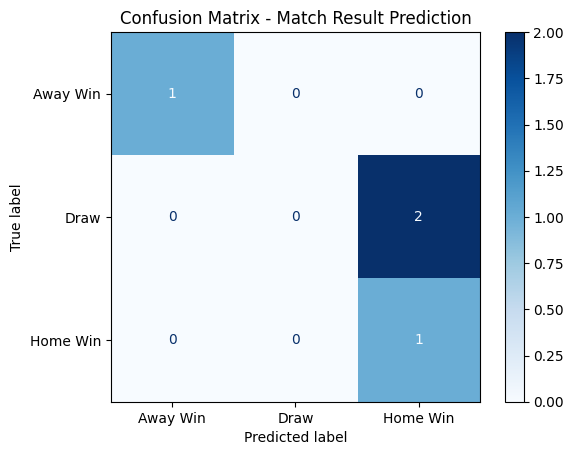

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Away Win", "Draw", "Home Win"])
disp.plot(cmap="Blues")

plt.title("Confusion Matrix - Match Result Prediction")
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test_num = y_test.astype(int)
y_pred_num = y_pred.astype(int)
mae = mean_absolute_error(y_test_num, y_pred_num)
mse = mean_squared_error(y_test_num, y_pred_num)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.5
Mean Squared Error (MSE): 0.5
Root Mean Squared Error (RMSE): 0.7071067811865476
